In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("uber_p2.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df=df.dropna()

In [16]:
df.duplicated().sum()

0

In [18]:
df=df.drop(['Unnamed: 0','key'],axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],utc=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [22]:
df['month']=df['pickup_datetime'].dt.month
df['year']=df['pickup_datetime'].dt.year
df['date']=df['pickup_datetime'].dt.day
df['hour']=df['pickup_datetime'].dt.hour
df['min']=df['pickup_datetime'].dt.minute
df['sec']=df['pickup_datetime'].dt.second
df['weekday']=df['pickup_datetime'].dt.weekday
df=df.drop(['pickup_datetime'],axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,hour,min,sec,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,5,2015,7,19,52,6,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,7,2009,17,20,4,56,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,8,2009,24,21,45,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,6,2009,26,8,22,21,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,8,2014,28,17,47,0,3


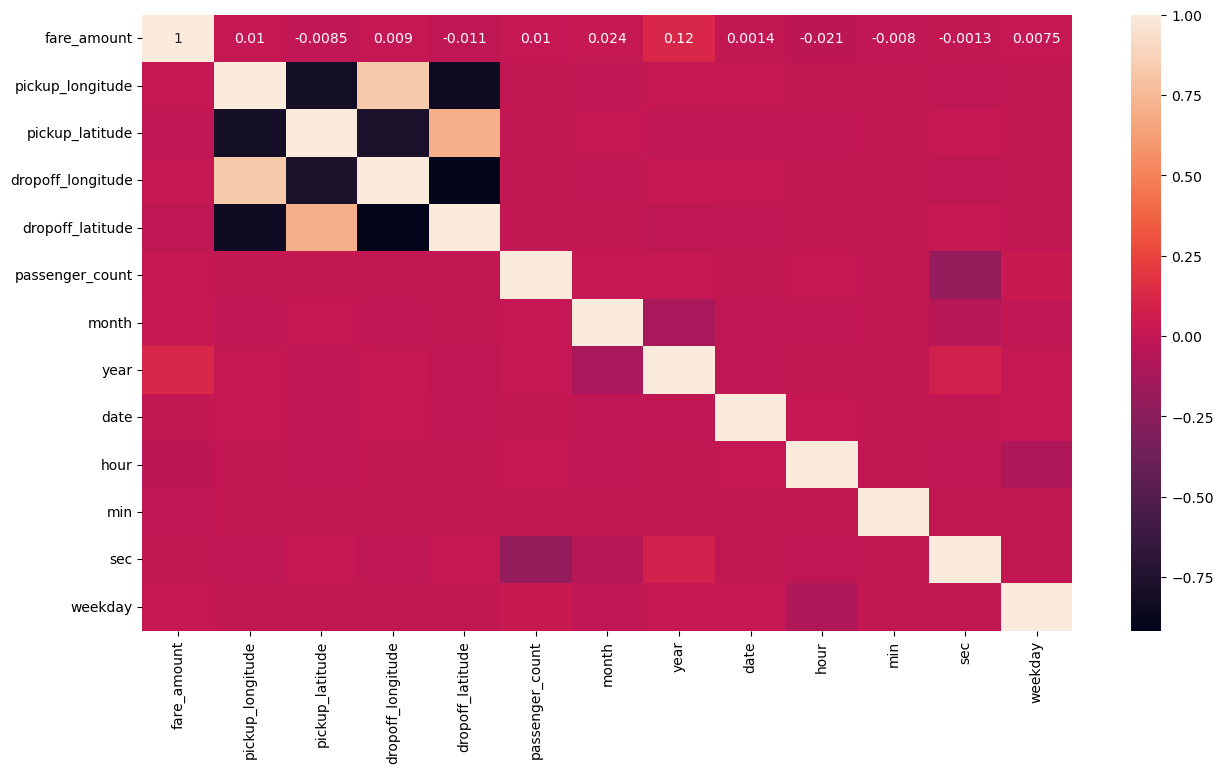

In [24]:
corr=df.corr()
plt.figure(figsize=(15,8))
co=sns.heatmap(corr,annot=True)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
df[col]=scaler.fit_transform(df[col])
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,hour,min,sec,weekday
0,-0.389820,-0.128712,0.103940,-0.112387,0.117638,1,5,2015,7,19,52,6,3
1,-0.369621,-0.128235,0.102628,-0.112021,0.121627,1,7,2009,17,20,4,56,4
2,0.155539,-0.129169,0.104253,-0.109570,0.124912,1,8,2009,24,21,45,0,0
3,-0.612003,-0.126641,0.110739,-0.109780,0.129431,3,6,2009,26,8,22,21,4
4,0.468616,-0.122173,0.104682,-0.110372,0.123235,5,8,2014,28,17,47,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-0.844286,-0.127596,0.104071,-0.111397,0.120151,1,10,2012,28,10,49,0,6
199996,-0.389820,-0.127393,0.103744,-0.112933,0.120052,1,3,2014,14,1,9,0,4
199997,1.973402,-0.127506,0.106289,-0.101672,0.113130,2,6,2009,29,0,42,0,0
199998,0.317127,-0.128477,0.102269,-0.111144,0.113546,1,5,2015,20,14,56,25,2


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,mean_absolute_error,mean_squared_error, r2_score

In [30]:
X=df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [32]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [33]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.297060911775367
Mean Squared Error: 0.5140848382622116
Root Mean Squared Error: 0.7169970978059895
R-squared: 0.5154661297141439
